In [1]:
import os
import tensorflow as tf

from modules.run import load_config
from modules.run import Trainer
from modules.data import DataManager, processing
from modules.models import pretrained_cnn, pretrained_cnn_multichannel

## Testing imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import os
from modules.data import util

In [8]:
import modules

config=load_config("cls_cropped_all_peru")
data_manager = DataManager(config)
# train_generator, val_generator, dataframe = data_manager.generate_peru()

In [3]:
dataframe

,filename,class
821,1074_83633.jpg,major
18308,105597_316926.jpg,minor
6379,122506_180119.jpg,major
15687,136187_130268.jpg,minor
3752,133509_115638.jpg,major
...,...,...
14257,151848_25379.jpg,minor
6616,154597_256221.jpg,major
8120,140658_56100.jpg,minor
8155,153558_60095.jpg,minor


In [6]:
directory = f"{modules.data.util.root()}/peru/{config['image_size']}/{config['resizing']}"

In [7]:
country="peru"

geo = modules.data.load_geodata(country)
geo = geo.iloc[::2].reset_index()
geo['index'] = geo['index'] / 2
osm, sf = modules.data.load_shapefile(country)

In [9]:
data_manager.shapefiles[country] = sf
data_manager.dataframes[country] = pd.DataFrame.merge(geo, osm, on="index")
data_manager.dataframes[country]['index'] = (data_manager.dataframes[country]['index'] * 2).astype('int32')
data_manager.dataframes[country] = data_manager.dataframes[country].set_index(data_manager.dataframes[country]['index'])
dataframe = data_manager._format_dataframe_for_flow("peru")
dir_names = os.listdir(directory)
dataframe['filename'] = dataframe['filename'].str.split('_', n = 1, expand = True)[1]
dir_names = pd.DataFrame(dir_names)[0].str.split('_', n=1, expand=True).drop_duplicates(1, keep='last')
dir_names = dir_names.rename(columns={0: "prefix", 1: "filename"})
dataframe = pd.merge(dataframe, dir_names, on='filename')
dataframe['filename'] = dataframe['prefix'] + '_' + dataframe['filename']
dataframe = dataframe.drop(columns='prefix')

In [10]:
print(dataframe)

                filename      class
0       37206_220646.jpg      major
1       45496_220647.jpg      major
2       30041_220650.jpg      major
3       46154_220651.jpg      major
4       46155_221049.jpg      major
...                  ...        ...
97276  190432_411503.jpg  two-track
97277  190431_411504.jpg  two-track
97278  190362_411505.jpg  two-track
97279  190364_411506.jpg  two-track
97280  123989_411532.jpg  two-track

[97281 rows x 2 columns]


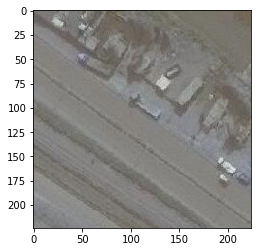

In [288]:
import cv2
asdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdfasdf
plt.imshow(cv2.imread('./data/peru/224/cropped/145030_150794.jpg'))
plt.show()